In [11]:
%load_ext autoreload
%autoreload 2
%run ~/FKMC/notebooks/notebook_preamble.py
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from FKMC.general import shapes, smooth, get_nearby_index

In [13]:
with open('/data/users/tch14/pickled_data/TU_phase_data.pickle', 'rb') as file: 
    TU_phase_obs = pickle.load(file)  

5.172413793103448 1.9586206896551726


/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


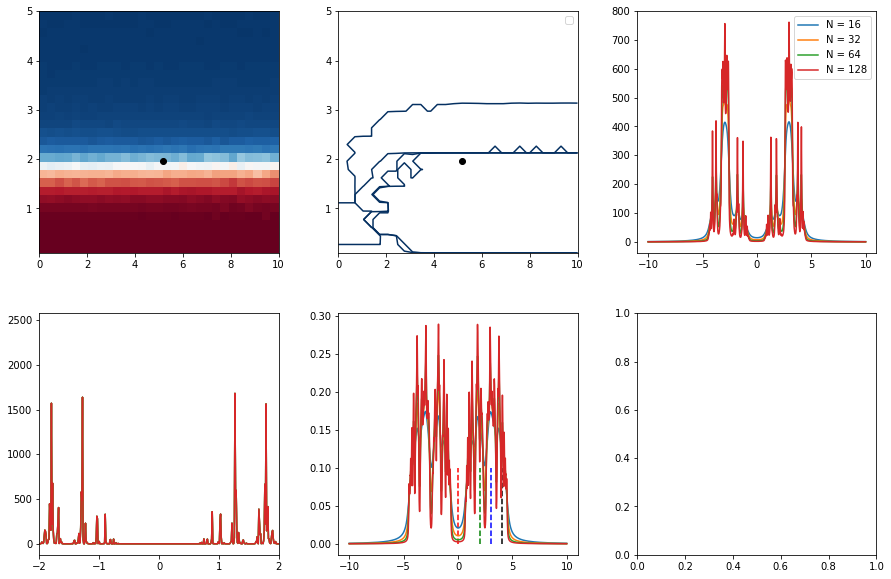

In [15]:
f, axes = plt.subplots(2,3, figsize = (15,10), gridspec_kw = dict(wspace = 0.25, hspace = 0.25))
axes = axes.flatten()


binder = 0
norm = mpl.colors.Normalize(vmin=0, vmax=1)
#TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
M2 = TU_phase_obs.Mf_moments[-1, :, :, :, 2].mean(axis = 0).T
M4 = TU_phase_obs.Mf_moments[-1, :, :, :, 4].mean(axis = 0).T
Y = M2**2 / M4 if binder else M2

pcol = axes[0].pcolormesh(TU_phase_obs.Us, TU_phase_obs.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)



T, T_i = get_nearby_index(TU_phase_obs.Ts, 1.8)
U, U_i = get_nearby_index(TU_phase_obs.Us, 5)
print(U, T)

axes[0].plot([U,], [T], color = 'k', marker = 'o')
axes[1].plot([U,], [T], color = 'k', marker = 'o')

E_bins = TU_phase_obs.E_bins 
e = 0.5

for e in [0.001, 0.01, 0.1, 1]:

    gap_indices = (-e < E_bins[:-1]) & (E_bins[:-1] < e)
    gap_state_count = TU_phase_obs.DOS[-1, :, :, :, :].mean(axis=0)[:, :, gap_indices].sum(axis = -1)

    pcol = axes[1].contour(TU_phase_obs.Us, TU_phase_obs.Ts, gap_state_count, cmap="RdBu_r", levels = [0.2,], label = 'e = {e}')

axes[1].legend()
    
#pcol = axes[1].pcolormesh(TU_phase_obs.Us, TU_phase_obs.Ts, gap_state_count, cmap="RdBu_r", linewidth=0, rasterized = True)


for i, N in zip(count(), TU_phase_obs.Ns):
    if N < 16: continue
    IPR = TU_phase_obs.IPR[i, :, U_i, T_i, :].mean(axis = 0)
    DOS = TU_phase_obs.DOS[i, :, U_i, T_i, :].mean(axis = 0)
    
    axes[3].plot(E_bins[:-1], DOS, label = f'N = {N}')
    axes[3].set(xlim = (-2*e, 2*e))
    
    #smooth by a value dependant on the size
    IPR = smooth(IPR, scale = 32/N, axis = -1)
    DOS = smooth(DOS, scale = 32/N, axis = -1)

    axes[2].plot(E_bins[:-1], DOS, label = f'N = {N}')

    
    axes[4].plot(E_bins[:-1], IPR)
    
    
energy_cuts = [0, 2, 3, 4]
cut_colors = 'rgbky'
energy_cuts_exact, energy_cuts_i = np.array([get_nearby_index(TU_phase_obs.E_bins, E) for E in energy_cuts]).T
axes[4].vlines(energy_cuts_exact, colors = cut_colors, linestyle= 'dashed', ymin = 0, ymax = 0.1)
    
axes[2].legend()

0 0 1000
0 0 1200
0 0 1300
0 0 1400


0 0 1000
0 0 1200
0 0 1300
0 0 1400


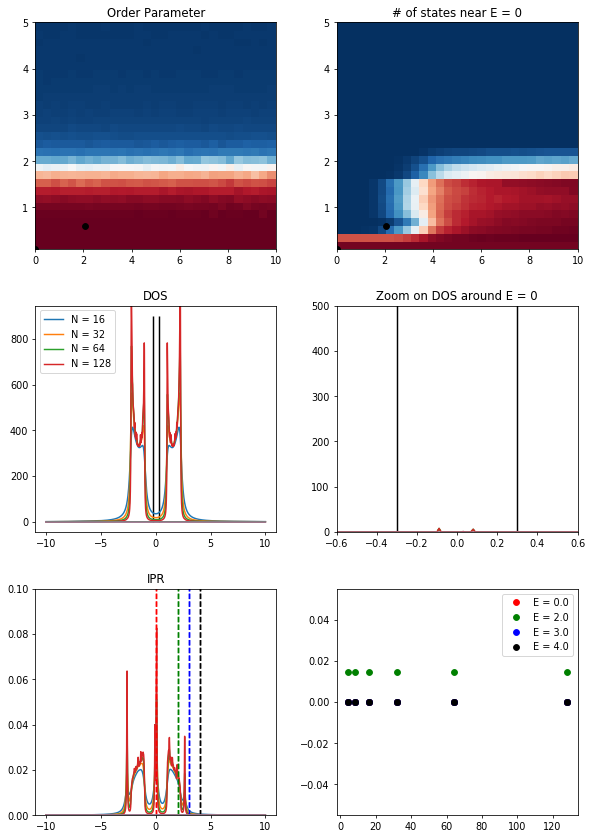

In [28]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

def lerp(start, end, lerp): return start * (1 - lerp) + lerp * end
T_bot = 0.5
T_top = 4
U_left = 2
U_right = 8

##how wide to make the central energy interval
e = 0.3

##where to make cuts for the scaling lines
energy_cuts = [0, 2, 3, 4]
cut_colors = 'rgbky'
energy_cuts_exact, energy_cuts_i = np.array([get_nearby_index(TU_phase_obs.E_bins, E) for E in energy_cuts]).T
energy_cuts_i = energy_cuts_i.astype(int)

def move_shape(i):
    if i < 0.25:
        j = i / 0.25
        T = lerp(T_bot, T_top, j)
        U = U_left
        return T, U
    if i < 0.5:
        j = (i-0.25) / 0.25
        T = T_top
        U = lerp(U_left, U_right, j)
        return T, U
    if i < 0.75:
        j = (i-0.5) / 0.25
        T = lerp(T_top, T_bot, j)
        U = U_right
        return T, U
    else:
        j = (i-0.75) / 0.25
        T = T_bot
        U = lerp(U_right, U_left, j)
        return T, U
    
f, axes = plt.subplots(3,2, figsize = (10,15), gridspec_kw = dict(wspace = 0.25, hspace = 0.25))
axes = axes.flatten()
axes[[0,1,2,3,4,5]] = axes[:]
    
###   plot the phase diagrams
binder = 0
norm = mpl.colors.Normalize(vmin=0, vmax=1)
#TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
M2 = TU_phase_obs.Mf_moments[-1, :, :, :, 2].mean(axis = 0).T
M4 = TU_phase_obs.Mf_moments[-1, :, :, :, 4].mean(axis = 0).T
Y = M2**2 / M4 if binder else M2

pcol = axes[0].pcolormesh(TU_phase_obs.Us, TU_phase_obs.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)

E_bins = TU_phase_obs.E_bins 
axes[2].vlines((-e, e), ymin = 0, ymax = 900)
axes[3].vlines((-e, e), ymin = 0, ymax = 800)

axes[0].set(title = 'Order Parameter')
axes[1].set(title = '# of states near E = 0')
axes[2].set(title = 'DOS')
axes[3].set(title = 'Zoom on DOS around E = 0')
axes[4].set(title = 'IPR')

axes[3].set(xlim = (-2*e, 2*e), ylim = (0, 500))
axes[4].set(ylim = (0, 0.1))


gap_indices = (-e < E_bins[:-1]) & (E_bins[:-1] < e)
gap_state_count = TU_phase_obs.DOS[-1, :, :, :, :].mean(axis=0)[:, :, gap_indices].sum(axis = -1)

pcol = axes[1].pcolormesh(TU_phase_obs.Us, TU_phase_obs.Ts, gap_state_count, cmap="RdBu_r", linewidth=0, rasterized = True)

#axes[0,0].set(xlim = (-5,5), ylabel = 'DOS\nT')
#axes[1,0].set(ylabel = 'IPR\nT', xlabel = '$\omega$')

#axes[0,1].set(ylabel = 'DOS')
#axes[1,1].set(ylabel = 'IPR', xlabel = '$\omega$')

legends = [None, None]
points = [None, None]
IPR_vlines = [None for _ in energy_cuts_exact]
E_lines = [None for _ in TU_phase_obs.Ns]
E_lines2 = [None for _ in TU_phase_obs.Ns]
IPR_lines = [None for _ in TU_phase_obs.Ns]
E_cut_lines = [None for _ in energy_cuts]

#plot all the stuff that needs to change and save references to them
def init():
    global legends
    #text = ax.text(0,1.05, f' ', fontsize = 15, transform=ax.transAxes)    
    
    T, T_i = get_nearby_index(TU_phase_obs.Ts, 0)
    U, U_i = get_nearby_index(TU_phase_obs.Us, 0)
    
    points[0], = axes[0].plot([U,], [T], color = 'k', marker = 'o')
    points[1], = axes[1].plot([U,], [T], color = 'k', marker = 'o')
    
    for i, E_i, E, colour in zip(count(), energy_cuts_i, energy_cuts_exact, cut_colors):
        print(U_i, T_i, E_i)
        IPR_cut = TU_phase_obs.IPR[:, :, U_i, T_i, E_i].mean(axis = 1)
        
        E_cut_lines[i], = axes[5].plot(TU_phase_obs.Ns, IPR_cut, color = colour, label = f'E = {E}', marker = 'o', linestyle = 'None')
        IPR_vlines[i], = axes[4].plot([E,E], [0,900], color = colour, linestyle= 'dashed')


    #IPR_lines = []
    #E_lines = []
    #for i, N in enumerate(o.Ns):
        #E_line, = axes[0, 1].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}')
        #IPR_line, = axes[1, 1].plot(o.E_bins[1: ], o.sI[i][T_select, :])
        #E_lines.append(E_line)
        #IPR_lines.append(IPR_line)
        
    for i, N in zip(count(), TU_phase_obs.Ns):
        if N < 16: continue
        IPR = TU_phase_obs.IPR[i, :, U_i, T_i, :].mean(axis = 0)
        DOS = TU_phase_obs.DOS[i, :, U_i, T_i, :].mean(axis = 0)

        #smooth by a value dependant on the size
        IPR = smooth(IPR, scale = 32/N, axis = -1)
        DOS = smooth(DOS, scale = 32/N, axis = -1)

        E_lines[i], = axes[2].plot(E_bins[:-1], 0*DOS, label = f'N = {N}')
        E_lines2[i], = axes[3].plot(E_bins[:-1], 0*DOS, label = f'N = {N}')
        IPR_lines[i], = axes[4].plot(E_bins[:-1], 0*IPR)
        

    
    if legends[0] == None: legends[0] = axes[2].legend(loc = 'upper left')
    if legends[1] == None: legends[1] = axes[5].legend()
    return np.concatenate([points, E_lines, IPR_lines, IPR_vlines, E_cut_lines, [legend,legend2]])
    
def update(frame):
    T, U =  move_shape(frame)
    
    T, T_i = get_nearby_index(TU_phase_obs.Ts, T)
    U, U_i = get_nearby_index(TU_phase_obs.Us, U)

    for p in points: p.set_data((U, ), (T, ))

    for i, N in zip(count(), TU_phase_obs.Ns):
        if N < 16: continue
        IPR = TU_phase_obs.IPR[i, :, U_i, T_i, :].mean(axis = 0)
        DOS = TU_phase_obs.DOS[i, :, U_i, T_i, :].mean(axis = 0)
        
        #smooth by a value dependant on the size
        sIPR = smooth(IPR, scale = 32/N, axis = -1)
        sDOS = smooth(DOS, scale = 32/N, axis = -1)

        E_lines[i].set_data(E_bins[:-1], sDOS)
        E_lines2[i].set_data(E_bins[:-1], DOS) #not smoothed!
        
        IPR_lines[i].set_data(E_bins[:-1], sIPR)
    
    for i, E_i, E, colour in zip(count(), energy_cuts_i, energy_cuts_exact, cut_colors):
        IPR_cut = TU_phase_obs.IPR[:, :, U_i, T_i, E_i].mean(axis = 1)
        
        E_cut_lines[i].set_data(TU_phase_obs.Ns, IPR_cut)
        #IPR_vlines[i].set_data([E,E], [0,900])
    
    return np.concatenate([points, E_lines, E_lines2, IPR_lines, E_cut_lines])
    
frames = np.linspace(0,1,120)
frames = np.linspace(0,1,12)

interval = 40000 /len(frames)

ani = FuncAnimation(f, update, 
                    frames=frames,
                    init_func=init, 
                    blit=False,
                    repeat_delay = 1000,
                    interval = interval,
        )
        
HTML(ani.to_html5_video())

In [ ]:
%%time
with open("TU_sweep.html", "w") as f:
    print(ani.to_html5_video(), file=f)

In [24]:
ani.save('TU_sweep.mp4', dpi = 300)

0 0 1000
0 0 1200
0 0 1300
0 0 1400
